# What Skills Are Companies Looking For in Data Analysts?

This project simulates a real-world job market analysis by scraping structured job listings from a public mock job board. While the data is fictional, the scraping, filtering, and analysis process mirrors how you would approach a real job site like LinkedIn or AngelList.

The goal is to:
-> Identify the most commonly requested tools and technologies (Python, SQL, Excel, Tableau, Power BI)
-> Analyze job demand across locations
-> Compare internship and full-time role frequency
-> Visualize insights using Python

Tools Used: Python, BeautifulSoup, Requests, Pandas, Matplotlib

Data Source: Publicly available mock listings from [Real Python's Fake Jobs Board](https://realpython.github.io/fake-jobs/)

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Fetching the page
url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

#Parsing job listings
job_elements = soup.find_all("div", class_="card-content")

jobs = []
for job in job_elements:
    title = job.find("h2", class_="title").text.strip()
    company = job.find("h3", class_="company").text.strip()
    location = job.find("p", class_="location").text.strip()
    date = job.find("time")["datetime"]
    apply_link = job.find_all("a")[-1]["href"] 

    jobs.append({
        "Title": title,
        "Company": company,
        "Location": location,
        "Date": date,
        "Apply Link": apply_link
    })

#Converting to DataFrame
df = pd.DataFrame(jobs)
print(f"Total job listings scraped: {len(df)}")  
df.to_csv("fake_job_listings.csv", index=False)
df.head()

Total job listings scraped: 100


,Title,Company,Location,Date,Apply Link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/se...
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/en...
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/le...
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/fi...
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/pr...


#### Scraping Job Listings

-> Used `requests` and `BeautifulSoup` to extract job listings from [realpython.github.io/fake-jobs](https://realpython.github.io/fake-jobs), an open-access site designed for practicing web scraping.

-> Each listing includes: Title, Company, Location, Posting Date, Application Link

-> The scraped results are stored in a pandas DataFrame and exported to `fake_job_listings.csv` for further analysis.

In [15]:
# Focusing on relevant job titles
keywords = ['data', 'analyst', 'analytics', 'python', 'sql']

filtered_df = df[df['Title'].str.lower().str.contains('|'.join(keywords))]
filtered_df.head()

,Title,Company,Location,Date,Apply Link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/se...
10,Software Engineer (Python),Garcia PLC,"Ericberg, AE",2021-04-08,https://realpython.github.io/fake-jobs/jobs/so...
20,Python Programmer (Entry-Level),"Moss, Duncan and Allen","Port Sara, AE",2021-04-08,https://realpython.github.io/fake-jobs/jobs/py...
26,Data scientist,Thomas Group,"Port Robertfurt, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/da...
30,Python Programmer (Entry-Level),Cooper and Sons,"West Victor, AE",2021-04-08,https://realpython.github.io/fake-jobs/jobs/py...


#### Filtering Data-Related Roles

To focus this project on data-related jobs, I filtered for listings containing keywords like `data`, `analyst`, `python`, `sql`, `excel`.
This step simulates narrowing down relevant jobs from a broader pool.

In [21]:
def extract_skills(title):
    skills = []
    title = title.lower()
    if 'python' in title:
        skills.append('Python')
    if 'sql' in title:
        skills.append('SQL')
    if 'excel' in title:
        skills.append('Excel')
    if 'tableau' in title:
        skills.append('Tableau')
    if 'power bi' in title:
        skills.append('Power BI')
    if 'analyst' in title:
        skills.append('Analyst')
    if 'data' in title:
        skills.append('Data')
    return skills

filtered_df = filtered_df.copy()
filtered_df['Skills'] = filtered_df['Title'].apply(extract_skills)
filtered_df[['Title', 'Skills']].head()

,Title,Skills
0,Senior Python Developer,[Python]
10,Software Engineer (Python),[Python]
20,Python Programmer (Entry-Level),[Python]
26,Data scientist,[Data]
30,Python Programmer (Entry-Level),[Python]


In [19]:
from collections import Counter

all_skills = sum(filtered_df['Skills'], [])
skill_counts = Counter(all_skills)

skill_series = pd.Series(skill_counts).sort_values(ascending=True)
skill_series

Data       2
Python    10
dtype: int64

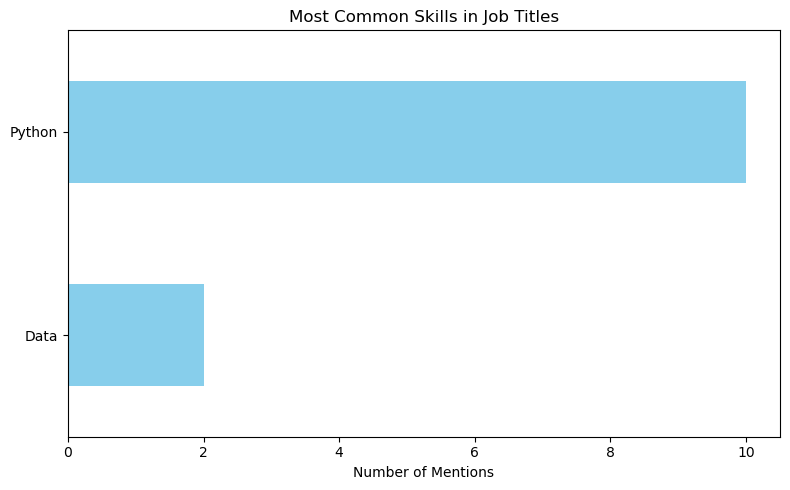

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
skill_series.plot(kind='barh', color='skyblue')
plt.title("Most Common Skills in Job Titles")
plt.xlabel("Number of Mentions")
plt.tight_layout()
plt.show()

#### Most Common Skills in Job Titles

-> To understand which technical skills companies most often look for, I scanned job titles for key tools and keywords.

-> This chart shows how often specific terms like `Python` and `Data` appear in job titles across all scraped listings.

-> Even though the dataset is small, it reflects a pattern seen in real hiring: Python is mentioned significantly more often, suggesting it remains a must-know language for most data roles.

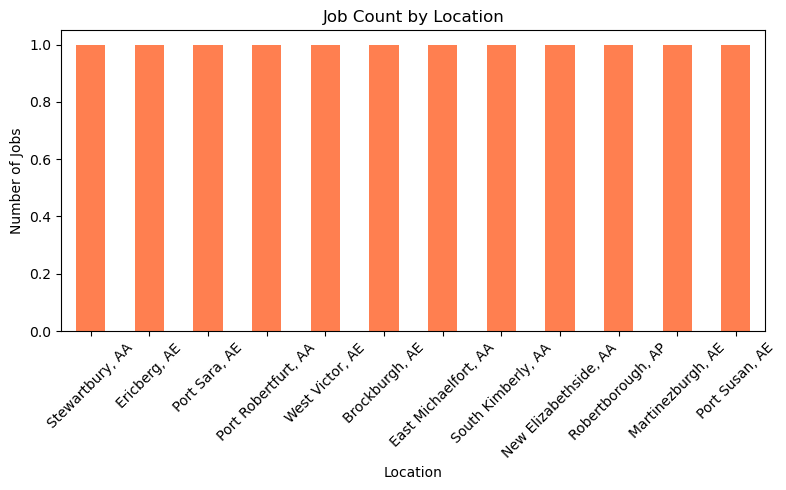

In [23]:
plt.figure(figsize=(8, 5))
location_counts.plot(kind='bar', color='coral')
plt.title("Job Count by Location")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Job Locations Overview

-> Visualizes job count by city from the scraped data.

-> Job postings are evenly distributed across locations.

-> This helps identify hiring hotspots.

In [24]:
remote_jobs = filtered_df[filtered_df['Location'].str.lower().str.contains("remote")]
print(f"Remote jobs found: {len(remote_jobs)}")

Remote jobs found: 0


In [25]:
def label_role_type(title):
    return 'Internship' if 'intern' in title.lower() else 'Full-time'

filtered_df['Role Type'] = filtered_df['Title'].apply(label_role_type)
filtered_df[['Title', 'Role Type']].head()

,Title,Role Type
0,Senior Python Developer,Full-time
10,Software Engineer (Python),Full-time
20,Python Programmer (Entry-Level),Full-time
26,Data scientist,Full-time
30,Python Programmer (Entry-Level),Full-time


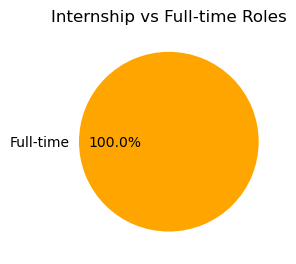

In [27]:
role_counts = filtered_df['Role Type'].value_counts()

plt.figure(figsize=(3, 3))
role_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightgreen'])
plt.title("Internship vs Full-time Roles")
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Role Type Analysis

-> All roles are classified as either **Full-time** or **Internship** based on keywords in job titles.

-> In this dataset, **100% of the roles are full-time**, with no internships detected.

-> No job listings explicitly mentioned "remote" in the location field, so **remote opportunities were 0**.

This analysis highlights that most listings in this sample reflect long-term, on-site roles, though real-world datasets often show more variation.

#### Task Summary

-> Scraped job listings from the target webpage using BeautifulSoup.

-> Exported the final dataset to `fake_job_listings.csv` for analysis.

-> Extracted relevant fields: Job Title, Company, Location, Date Posted, and Apply Link.

-> Stored data in a structured format using a pandas DataFrame.

-> Learned how to navigate HTML tags and build a custom dataset for analysis.